In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
weather_df = pd.read_csv("wetter.csv")
kiwo_df = pd.read_csv("kiwo.csv")
sales_df = pd.read_csv("umsatzdaten_gekuerzt.csv")
holidays_df = pd.read_csv("holidays.csv")

print("Weather")
print(f" has {len(weather_df)} rows")
print(weather_df.head())
print("Kieler Woche")
print(f" has {len(kiwo_df)} rows")
print(kiwo_df.head())
print("Sales")
print(f" has {len(sales_df)} rows")
print(sales_df.head())
print("Holidays")
print(f" has {len(holidays_df)} rows")
print(holidays_df.head())

df = weather_df.merge(kiwo_df, on="Datum", how="left").merge(sales_df, on="Datum").merge(holidays_df, left_on="Datum", right_on="date", suffixes=("", "holiday_",))
df.fillna({"KielerWoche": 0, "holiday_sommer": 0, "holiday_autumn": 0, "holiday_christmas": 0, "holiday_winter": 0, "holiday_easter": 0, "holiday_pentecoast": 0}, inplace=True)

print(df.head())

Weather
 has 2601 rows
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0
Kieler Woche
 has 72 rows
        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1
Sales
 has 9334 rows
        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
Holidays
 has 577 rows
         date  summer  autumn  christmas  winter  easter  pentecoast
0  2013-06-24   

        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
0  2013-07-01         6.0     17.8375                   15        20.0   
1  2013-07-01         6.0     17.8375                   15        20.0   
2  2013-07-01         6.0     17.8375                   15        20.0   
3  2013-07-01         6.0     17.8375                   15        20.0   
4  2013-07-01         6.0     17.8375                   15        20.0   

   KielerWoche  Warengruppe      Umsatz        date  summer  autumn  \
0          0.0            1  148.828353  2013-07-01       1       0   
1          0.0            2  535.856285  2013-07-01       1       0   
2          0.0            3  201.198426  2013-07-01       1       0   
3          0.0            4   65.890169  2013-07-01       1       0   
4          0.0            5  317.475875  2013-07-01       1       0   

   christmas  winter  easter  pentecoast  
0          0       0       0           0  
1          0       0       0           0  

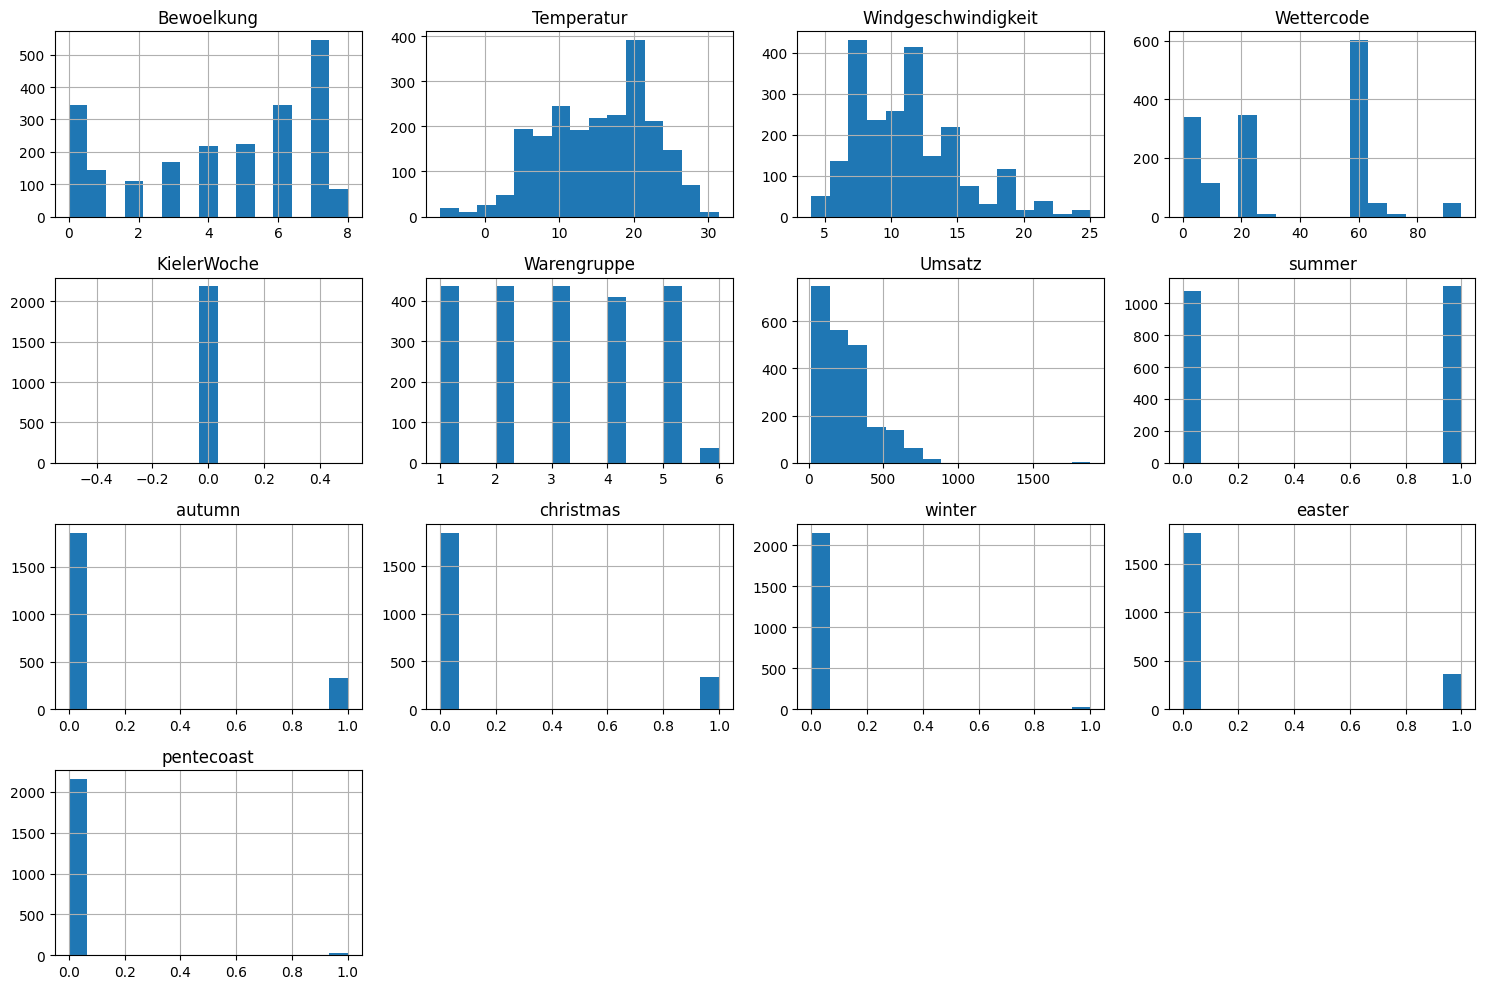

Box plots to identify outliers


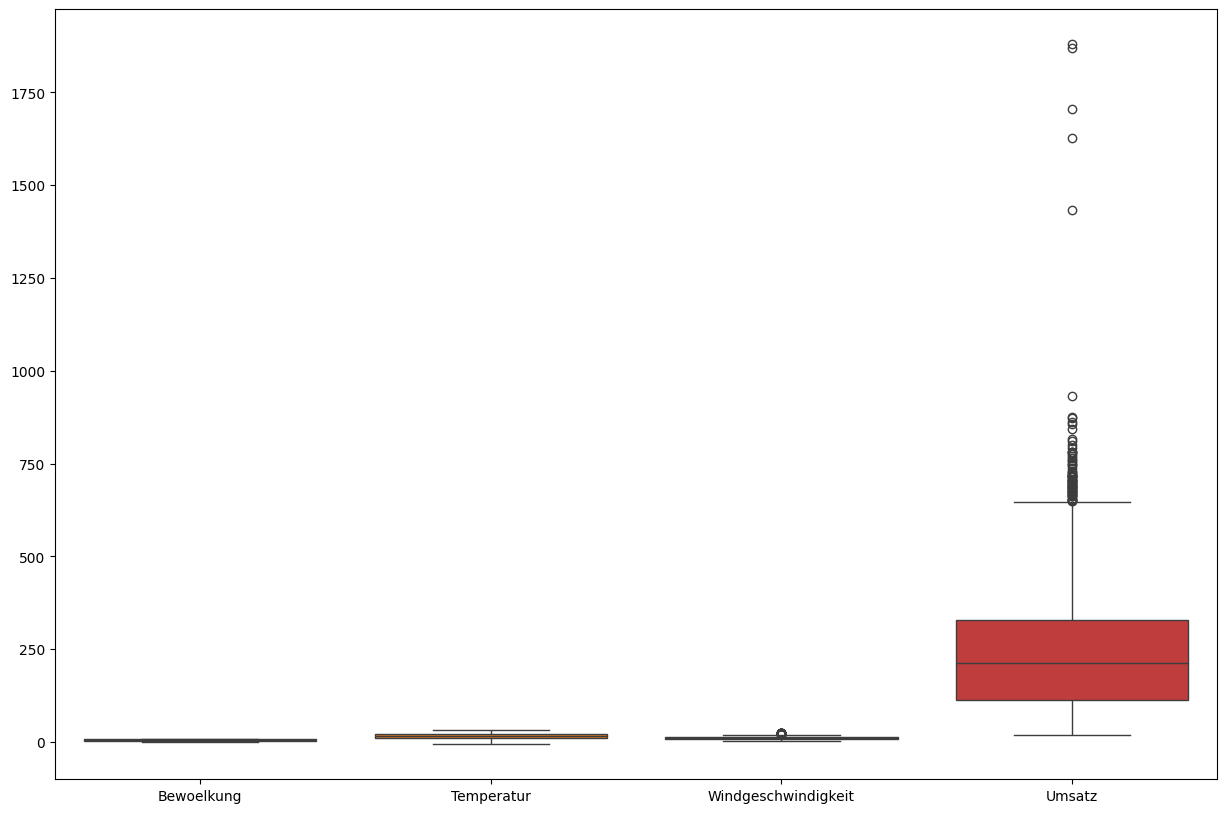

Correlation heatmap for numerical columns


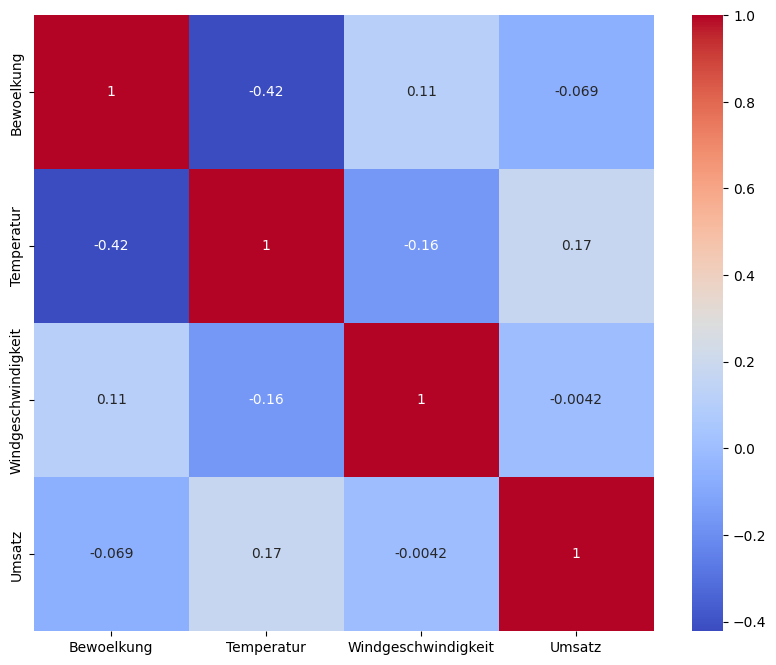

Bar plots for categorical columns


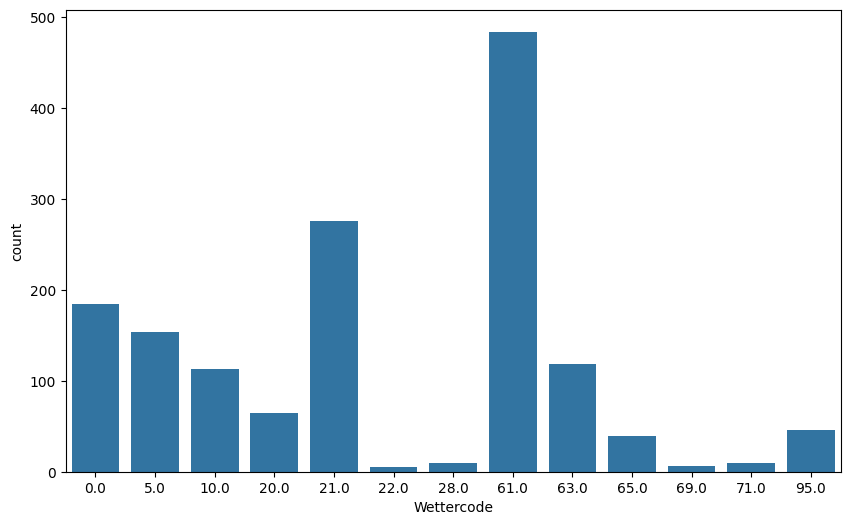

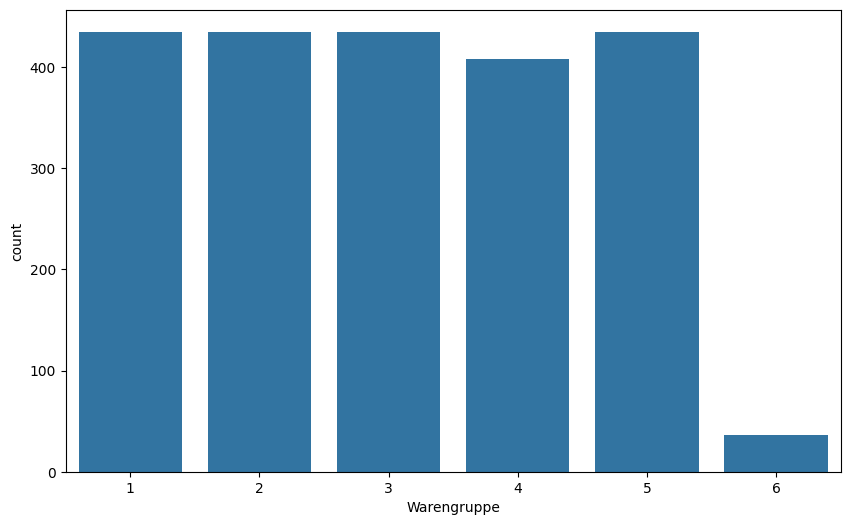

Insights and Interpretation
Correlation between numerical columns shows that 'Umsatz' has a positive correlation with 'Temperatur'.
The dataset contains 2184 entries with 673 missing values in column 'Wettercode'. 'Warengruppe' and 'Wettercode' are not evenly distributed.


In [10]:


# Step 1: Inspect the Dataset
print(df.head())
print(df.info())
print(df.describe())

# Step 2: Check for Missing Values
print("Missing Values")
print(df.isnull().sum())

# Step 3: Descriptive Statistics for Numerical Columns
print("Descriptive Statistics")
print(df.describe())

# Descriptive Statistics for Categorical Columns
print("Descriptive Statistics for Categorical Columns")
print(df['Wettercode'].value_counts())
print(df['Warengruppe'].value_counts())

# Step 4: Data Visualization
# Histograms for numerical columns
print("Histograms for numerical columns")
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box plots to identify outliers
print("Box plots to identify outliers")
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Umsatz']])
plt.show()

# Correlation heatmap for numerical columns
print("Correlation heatmap for numerical columns")
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Umsatz']].corr(), annot=True, cmap='coolwarm')
plt.show()

# Bar plots for categorical columns
print("Bar plots for categorical columns")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Wettercode')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Warengruppe')
plt.show()

# Step 5: Insights and Interpretation
print("Insights and Interpretation")
print("Correlation between numerical columns shows that 'Umsatz' has a positive correlation with 'Temperatur'.")
print("The dataset contains 2184 entries with 673 missing values in column 'Wettercode'. 'Warengruppe' and 'Wettercode' are not evenly distributed.")
